<a href="https://colab.research.google.com/github/ikanx101/G-Colab/blob/main/Learning_Forum_Deep_Learning_Regresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# _LEARNING FORUM_
## _Market Research_ @nutrifood
_by: ikanx_
### _Workshop Deep Learning with TensorFlow using Google Colab_

_Dear All,_

Hari ini kita akan mempelajari bagaimana cara membuat model _deep learning_ di __Google Colab__.

Akan ada tiga pokok bahasan, yakni:

1. Regresi,
1. Klasifikasi, dan
1. _Time series forecasting_.

Pada masing-masing bagian, kita akan mempelajari _best practices_ dalam membuat model _deep learning_.

---

### Pendahuluan: __TensorFlow di Google Colab__

TensorFlow adalah salah satu _open source tools_ buatan Google untuk membuat model _deep learning_. Basisnya TensorFlow adalah Python. Keunggulannya:

1. Tidak perlu di-_install_ (bisa menjalankan via _cloud_).
1. Modelnya bisa di-_transfer_ dan dipakai di _computing environment_ lainnya.
1. Tersedia dalam bahasa __R__ atau __Python__.
1. Model bisa disimpan dalam suatu _object_ dan dimasukkan ke dalam mesin _Google Cloud_.

Kelemahan:

1. Instalasi di Windows mungkin akan lebih rumit.
1. Saat ada _version update_, beberapa skrip __mungkin akan berubah__.

Untuk bisa menggunakan TensorFlow, kita harus meng-_install_ `library(keras)` pada Google Colab. Selain itu, jika diperlukan kita juga meng-_install_ `library(caret)` yang berguna untuk melakukan beberapa _pre-processing_ ala _machine learning_ di __R__.

Dalam beberapa kasus, kita perlu melakukan "sedikit" _pre-processing_ sebelum kita melatih modelnya.

---

### Materi Hari Ini: Proses Kerja TensorFlow

Alur kerjanya meliputi:

1. _Input_,
    - Berupa matriks untuk _predictors_ dan matriks untuk _target_.
1. _Process_,
    - Berapa banyak _layer_, _nodes_, dan _activation function_.
    - Berapa banyak _epoch_, _learning rate_, dan _validation split_.
1. _Output_.
    - Berupa _tensor object_ bertipe _vector_ yang berisi:
        1. Probabilitas untuk klasifikasi, dan
        1. _Value_ untuk regresi dan _forecast time series_.




In [11]:
# install libraries yang diperlukan
# install.packages("keras")
# install.packages("caret")

# kita panggil libraries
library(dplyr)
library(ggplot2)
library(caret)
library(keras)
library(tensorflow)

## $1^{st}$ _Case:_ Regresi Menggunakan _Deep Learning_

Apakah kalian ingat saat _learning forum_ terdahulu, saya pernah menginformasikan bahwa _deep learning_ adalah _artificial neural network_ di mana setiap _nodes_-nya berisi operasi regresi linear. Sehingga semakin besar dan banyak _neural network_ yang terlibat, maka _ANN_ menjadi sebuah `mega mesin regresi linear`.

Kali ini kita akan membuat model regresi linear menggunakan _deep learning_.

### Soal

Dari data yang diberikan, buatlah model yang bisa menyerupai $y = f(x), x = [-2,\pi]$ sebagai berikut:

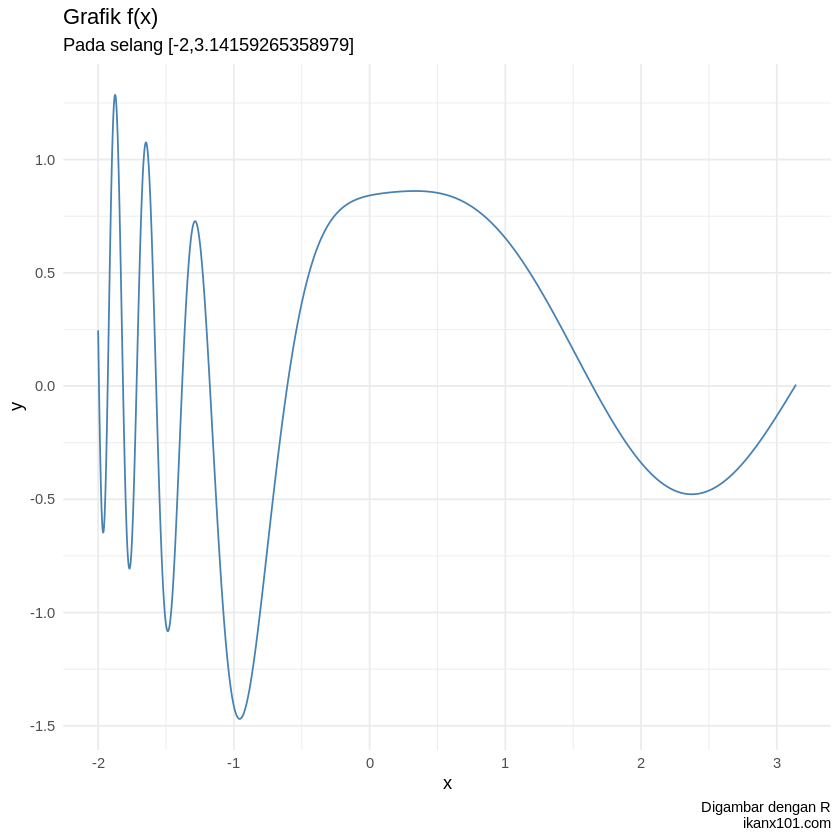

In [12]:
# @title
rm(list=ls())

# fungsi untuk menggambar
gambar_fx = function(f,a,b,delta){
  temp = data.frame(
    x = seq(a,b,by = delta)
  ) %>%
    mutate(y = f(x)) %>%
    filter(!is.nan(y))
  subtitle = paste0("Pada selang [",a,",",b,"]")
  caption = "Digambar dengan R\nikanx101.com"
  temp %>%
    ggplot(aes(x,y)) +
    geom_line(color = "steelblue") +
    theme_minimal() +
    labs(title = "Grafik f(x)",
         subtitle = subtitle,
         caption = caption)

}

# ini f(x)
f = function(x){sin(x) * cos(x) + sin(5^(-x))}

# ini selang
a = -2
b = pi
delta = 0.0001

# ini gambarnya
gambar_fx(f,a,b,delta)

# kita akan buat regresi dari data ini:
df = data.frame(x = seq(a,b,by = delta))
df = df %>% mutate(y = sapply(x,f))

Namun sebelumnya, apakah kita bisa mendapatkan $f(x)$ menggunakan regresi linear atau polinomial biasa?

mae_linear,mae_poli
<dbl>,<dbl>
0.5382325,0.0769018


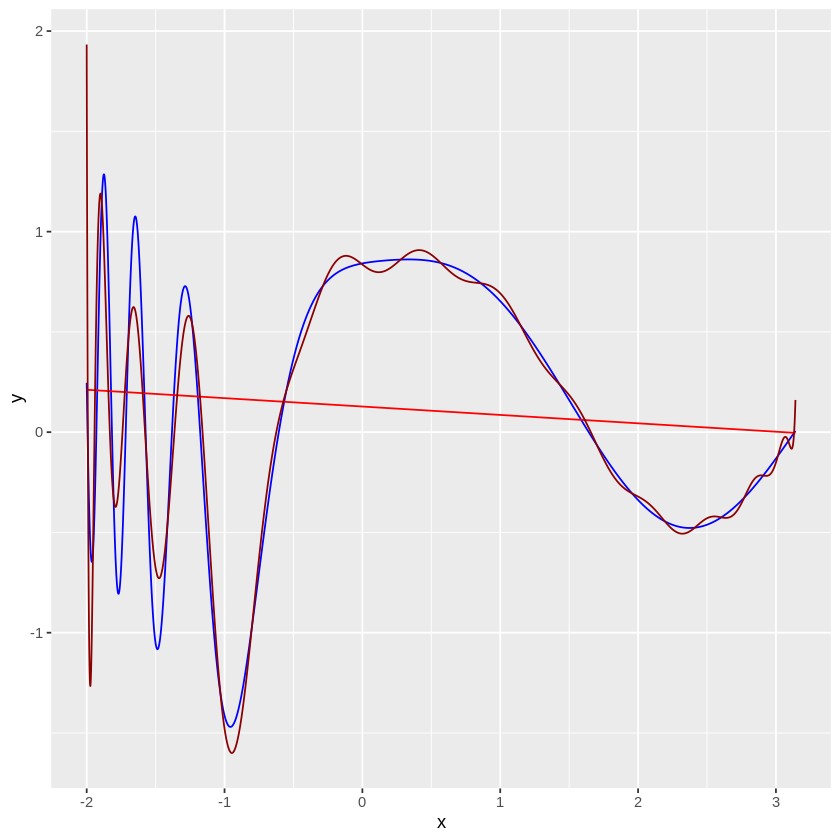

In [13]:
rm(list=ls())

# ambil data
link = "https://raw.githubusercontent.com/ikanx101/Live-Session-Nutrifood-R/master/LEFO%20Market%20Research/LEFO%20MR%202023/Keras/regresi/soal_regresi.csv"
df   = read.csv(link)

# membuat model regresi linear
lin_model   = lm(y ~ x,data = df)
pred_y1     = predict(lin_model,df)

# membuat model regresi polinom
# derajat 26
poli_model  = lm(y ~ polym(x,degree = 26),data = df)
pred_y2     = predict(poli_model,df)

# menggabungkan
df_hasil    = df |> mutate(y_linear = pred_y1,y_polinom = pred_y2)

# membuat plot y = f(x)
df_hasil |>
  ggplot() +
  geom_line(aes(x = x,y = y),group = 1,color = "blue") +
  geom_line(aes(x = x,y = y_linear),group = 1,color = "red") +
  geom_line(aes(x = x,y = y_polinom),group = 1,color = "darkred")

# menghitung mean absolute error
df_hasil |>
  mutate(error_linear = abs(y - y_linear),
         error_poli   = abs(y - y_polinom)) |>
  summarise(mae_linear = mean(error_linear),
            mae_poli   = mean(error_poli))

## Temuan I

Regresi polinom adalah regresi yang paling mendekati $f(x)$.

Namun:

> Apakah mungkin kita melakukan modifikasi data tertentu sehingga hasil regresi polinomnya menjadi lebih akurat?

Warning message in predict.lm(poli_model2, df_modif):
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


mae_linear,mae_poli,mae_modif
<dbl>,<dbl>,<dbl>
0.5382325,0.0769018,0.002079636


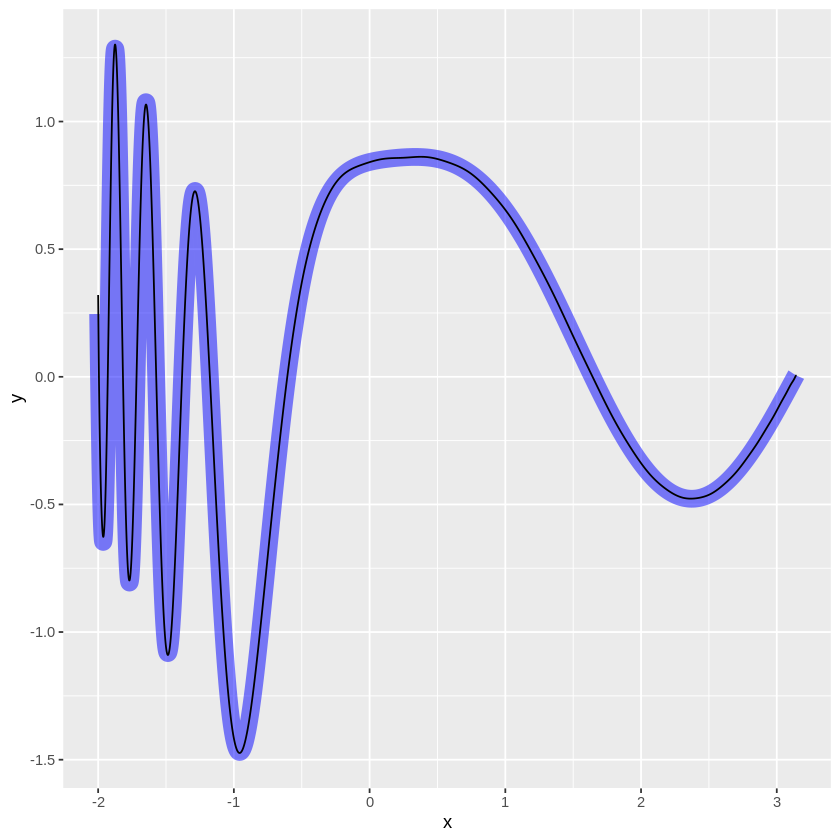

In [14]:
# kita modifikasi terlebih dahulu
df_modif =
  df |>
  mutate(x1 = x^2,
         x2 = x^3,
         x3 = x^4,
         x4 = sin(x),
         x5 = cos(x),
         x6 = exp(x))

# membuat model regresi polinom
# derajat 15
poli_model2 = lm(y ~ poly(x,15) + poly(x1,15) + poly(x2,15) + poly(x3,15) +
                     poly(x4,15) + poly(x5,15) + poly(x6,15),data = df_modif)
pred_modif  = predict(poli_model2,df_modif)

# menggabungkan hasil modif ke df_hasil
df_hasil    = df_hasil |> mutate(y_modif = pred_modif)

# membuat plot y = f(x)
df_hasil |>
  ggplot() +
  geom_line(aes(x = x,y = y),group = 1,color = "blue",linewidth = 5,alpha = .5) +
  #geom_line(aes(x = x,y = y_linear),group = 1,color = "red",alpha = .5) +
  #geom_line(aes(x = x,y = y_polinom),group = 1,color = "green",alpha = .5) +
  geom_line(aes(x = x,y = y_modif),group = 1,color = "black")

# menghitung mean absolute error
df_hasil |>
  mutate(error_linear = abs(y - y_linear),
         error_poli   = abs(y - y_polinom),
         error_modif  = abs(y - y_modif)) |>
  summarise(mae_linear = mean(error_linear),
            mae_poli   = mean(error_poli),
            mae_modif  = mean(error_modif))

Sekarang bagaimana menyelesaikan soal ini dengan _deep learning_?

## Membuat Model _Deep Learning_

Proses-prosesnya adalah sebagai berikut:

1. Pisahkan _predictors_ dan _target_.
1. Ubah keduanya menjadi tipe matriks.
1. Buat modelnya (_layers_, _nodes_, _activation function_, _optimizers_, _epochs_, _etc_.)
1. _Train_ dan _validation_.



In [15]:
# deep learning
# langkah 1 dan 2
predictors = df |> pull(x) |> as.matrix()
target     = df |> pull(y) |> as.matrix()

# tahap 3
# buat model
model = keras_model_sequential() %>%
  layer_dense(units = 86, activation="relu", input_shape = ncol(predictors)) %>%
  layer_dense(units = 21, activation = "relu") %>%
  layer_dense(units = 12, activation = "relu") %>%
  layer_dense(units = 7,  activation = "relu") %>%
  layer_dense(units = 1,  activation = "linear")

# optimizer
model %>% compile(
  loss = "mse",
  optimizer =  "adam",
  metrics = list("mean_absolute_error")
)

# summary model
model %>% summary()

# proses train
model %>% keras::fit(predictors, target, epochs = 75,verbose = 0)

# tahap 4
# proses validasi
scores = model %>% evaluate(predictors, target, verbose = 0)
print(scores)

Model: "sequential_2"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_14 (Dense)                   (None, 86)                      172         
 dense_13 (Dense)                   (None, 21)                      1827        
 dense_12 (Dense)                   (None, 12)                      264         
 dense_11 (Dense)                   (None, 7)                       91          
 dense_10 (Dense)                   (None, 1)                       8           
Total params: 2,362
Trainable params: 2,362
Non-trainable params: 0
________________________________________________________________________________
               loss mean_absolute_error 
       0.0004952905        0.0085565904 


Kita dapatkan bahwa _score MAE_ yang dihasilkan adalah sebesar: __0.0085565904__

## Temuan II

Hanya dengan bermodalkan $x$ saja, _deep learning_ bisa menghasilkan akurasi yang __baik__.

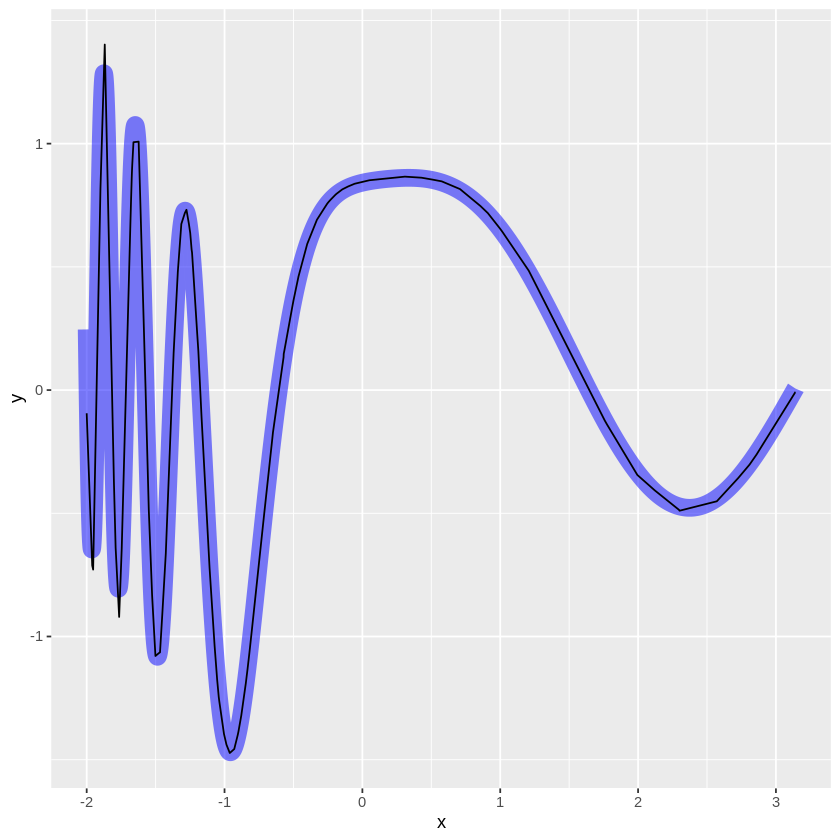

In [16]:
# kita buat prediksinya
y_deep = model %>% predict(predictors)

# menggabungkan hasil deep learning ke df_hasil
df_hasil    = df_hasil |> mutate(y_deep = y_deep)

# membuat plot y = f(x)
df_hasil |>
  ggplot() +
  geom_line(aes(x = x,y = y),group = 1,color = "blue",linewidth = 5,alpha = .5) +
  #geom_line(aes(x = x,y = y_linear),group = 1,color = "red",alpha = .5) +
  #geom_line(aes(x = x,y = y_polinom),group = 1,color = "green",alpha = .5) +
  #geom_line(aes(x = x,y = y_modif),group = 1,color = "black") +
  geom_line(aes(x = x,y = y_deep),group = 1,color = "black")

> Bagaimana jika kita memasukkan data dari `df_modif` ?

Apakah akurasi model yang didapatkan bisa lebih bagus lagi?

In [17]:
# deep learning
# langkah 1 dan 2
predictors = df_modif |> select(-y) |> as.matrix()
target     = df_modif |> pull(y) |> as.matrix()

# tahap 3
# buat model
model_modif = keras_model_sequential() %>%
  layer_dense(units = 86, activation="relu", input_shape = ncol(predictors)) %>%
  layer_dense(units = 21, activation = "relu") %>%
  layer_dense(units = 12, activation = "relu") %>%
  layer_dense(units = 7,  activation = "relu") %>%
  layer_dense(units = 1,  activation = "linear")

# optimizer
model_modif %>% compile(
  loss = "mse",
  optimizer =  "adam",
  metrics = list("mean_absolute_error")
)

# summary model
model_modif %>% summary()

# proses train
model_modif %>% keras::fit(predictors, target, epochs = 75,verbose = 0)

# tahap 4
# proses validasi
scores = model_modif %>% evaluate(predictors, target, verbose = 0)
print(scores)

Model: "sequential_3"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_19 (Dense)                   (None, 86)                      688         
 dense_18 (Dense)                   (None, 21)                      1827        
 dense_17 (Dense)                   (None, 12)                      264         
 dense_16 (Dense)                   (None, 7)                       91          
 dense_15 (Dense)                   (None, 1)                       8           
Total params: 2,878
Trainable params: 2,878
Non-trainable params: 0
________________________________________________________________________________
               loss mean_absolute_error 
       0.0001403618        0.0045986301 


## Temuan III

Kita bisa lihat bahwa _MAE_ yang dihasilkan semakin mengecil sehingga akurasi dari model semakin membaik.

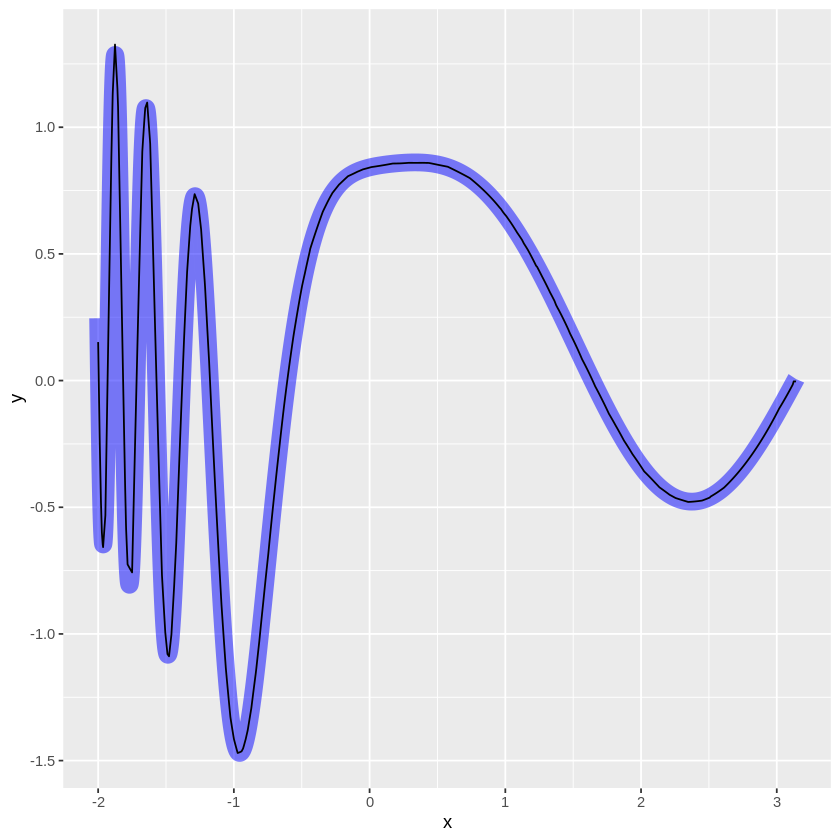

In [18]:
# kita buat prediksinya
y_deep_modif = model_modif %>% predict(predictors)

# menggabungkan hasil deep learning ke df_hasil
df_hasil    = df_hasil |> mutate(y_deep_2 = y_deep_modif)

# membuat plot y = f(x)
df_hasil |>
  ggplot() +
  geom_line(aes(x = x,y = y),group = 1,color = "blue",linewidth = 5,alpha = .5) +
  #geom_line(aes(x = x,y = y_linear),group = 1,color = "red",alpha = .5) +
  #geom_line(aes(x = x,y = y_polinom),group = 1,color = "green",alpha = .5) +
  #geom_line(aes(x = x,y = y_modif),group = 1,color = "black") +
  #geom_line(aes(x = x,y = y_deep),group = 1,color = "black") +
  geom_line(aes(x = x,y = y_deep_2),group = 1,color = "black")

## Temuan IV

Apakah regresi dengan _deep learning_ tidak memiliki kelemahan? Sebutkan kelemahannya! (jika ada)

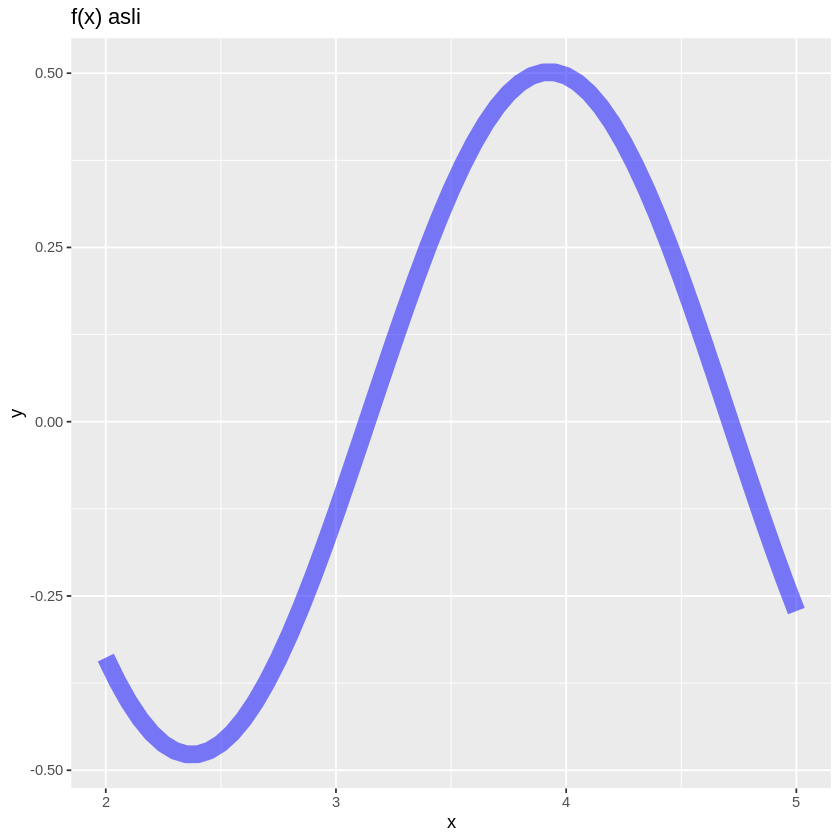

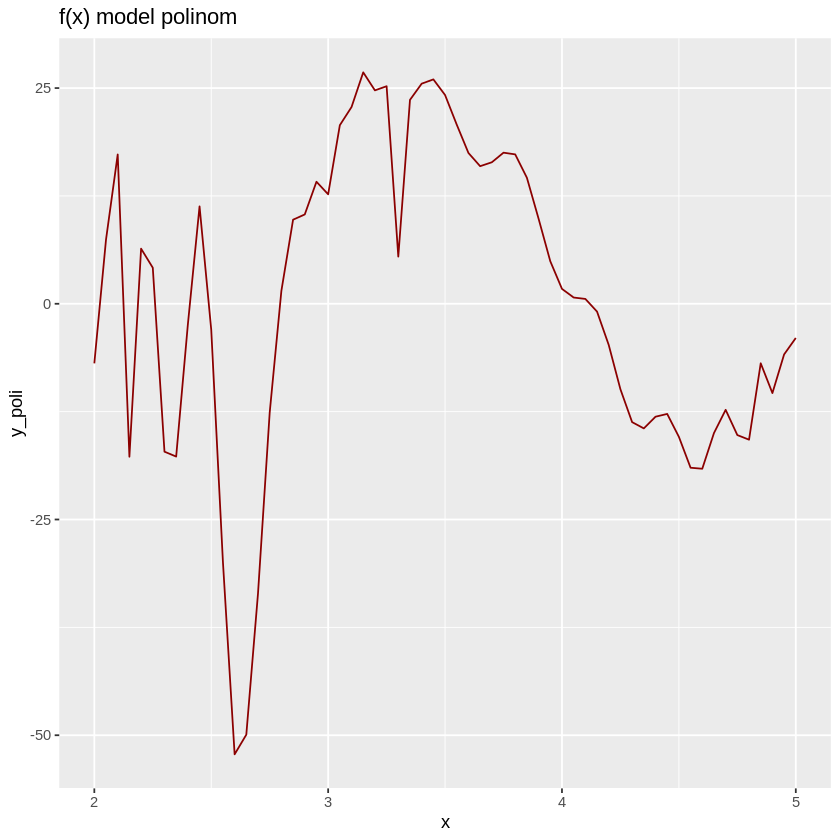

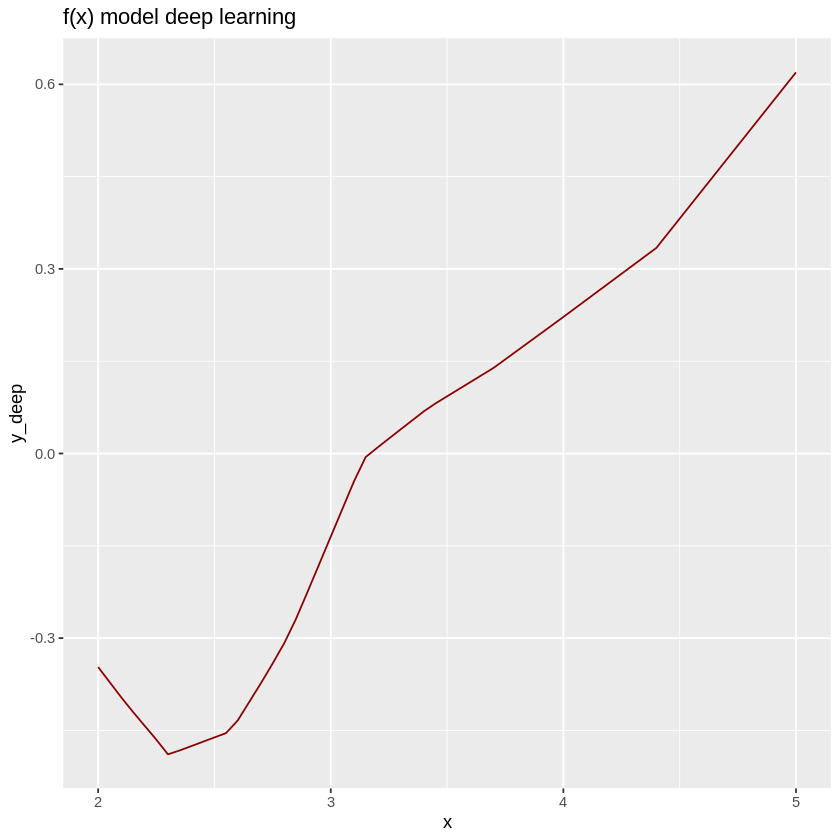

In [19]:
# ini adalah fungsi soalnya
f = function(x){sin(x) * cos(x) + sin(5^(-x))}

# ini x yang baru
x_new = seq(2,5,by = 0.05)
# membuat data frame baru
df_new = data.frame(x = x_new) |> mutate(y = sapply(x,f))

# kita buat prediksi dari model polinom
pred_modif   = predict(poli_model,df_new)
df_new       = df_new |> mutate(y_poli = pred_modif)

# kita buat model prediksi dari deep learning (yang pertama)
# kita buat prediksinya
y_deep       = model %>% predict(as.matrix(x_new))
df_new       = df_new |> mutate(y_deep = y_deep)

# membuat plot y = f(x) asli
df_new |>
  ggplot() +
  geom_line(aes(x = x,y = y),group = 1,color = "blue",linewidth = 5,alpha = .5) +
  labs(title = "f(x) asli")

# membuat plot y = f(x) polinom
df_new |>
  ggplot() +
  geom_line(aes(x = x,y = y_poli),group = 1,color = "darkred") +
  labs(title = "f(x) model polinom")

# membuat plot y = f(x) deep learning
df_new |>
  ggplot() +
  geom_line(aes(x = x,y = y_deep),group = 1,color = "darkred") +
  labs(title = "f(x) model deep learning")


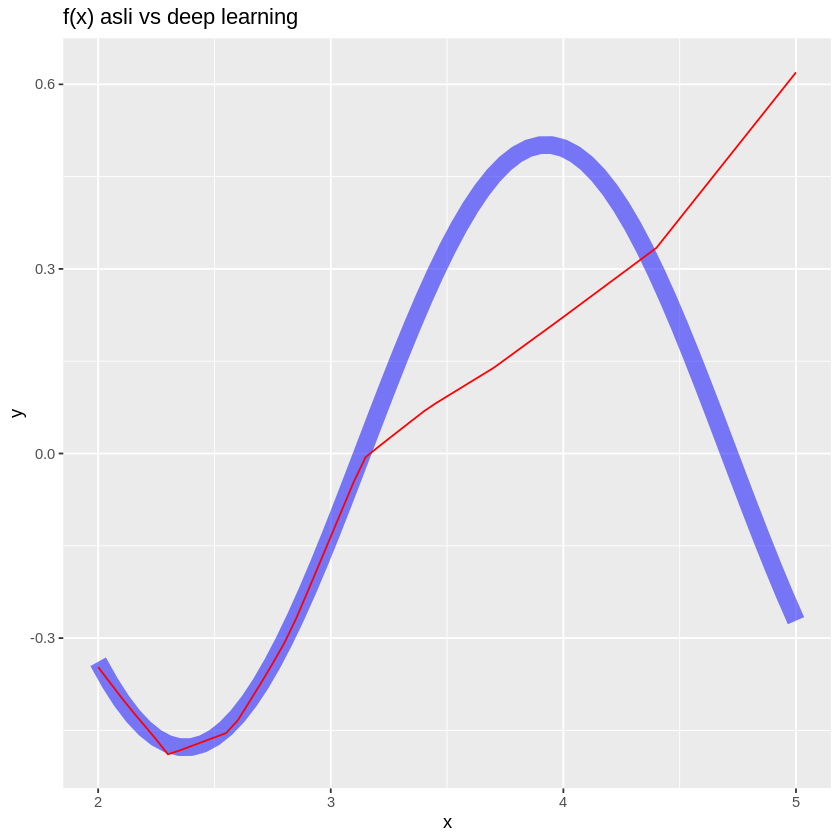

In [20]:
df_new |>
  ggplot() +
  geom_line(aes(x = x,y = y),group = 1,color = "blue",linewidth = 5,alpha = .5) +
  geom_line(aes(x = x,y = y_deep),group = 1,color = "red") +
  labs(title = "f(x) asli vs deep learning")


# KESIMPULAN MODEL REGRESI _DEEP LEARNING_

1. Gunakan hanya untuk _defined range_ alias _domain_ saja.